In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
import os
path=r"C:\Users\KHAN\Desktop\video working"
os.listdir(path)

['.ipynb_checkpoints',
 'Sales-April.csv',
 'Sales-Februrary.csv',
 'Sales-January.csv',
 'Sales-March.csv',
 'Sales-May.csv',
 'Untitled.ipynb']

In [22]:
files=[file for file in os.listdir(path)if not file.startswith('.')]
all_data=pd.DataFrame()
for file in files:
    raw_data=pd.read_csv(path+'/'+file,encoding='latin1')
    all_data=pd.concat([all_data,raw_data],ignore_index=True,axis=0)
all_data .to_csv('all_data.csv',index=False)

In [33]:
all_data.head(500)

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount,day,month,year,minute,hour
0,Patrick Graham,Washington,West,Jeremy Baker,2016-04-01,Junk,8,12.42,99.36,1,4,2016,0,0
1,Frances Warren,New Jersey,East,Albert Dunn,2016-04-01,Widgets,9,53.35,480.15,1,4,2016,0,0
2,Sara Snyder,New York,East,Robert Hayes,2016-04-01,Junk,4,12.42,49.68,1,4,2016,0,0
3,Randy Watson,New York,East,Cheryl Riley,2016-04-01,Widgets,5,53.35,266.75,1,4,2016,0,0
4,Randy Watson,New Jersey,East,Kimberly Coleman,2016-04-01,Widgets,2,53.35,106.70,1,4,2016,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Patrick Graham,Washington,West,Karen Willis,2016-02-07,Junk,9,12.42,111.78,7,2,2016,0,0
496,Frances Warren,New Jersey,East,Russell Day,2016-02-07,Stuff,6,16.32,97.92,7,2,2016,0,0
497,Sara Snyder,Massachusetts,East,Susan Watkins,2016-02-07,Widgets,7,53.35,373.45,7,2,2016,0,0
498,Patrick Graham,Washington,West,Craig Reyes,2016-02-07,Junk,9,12.42,111.78,7,2,2016,0,0


In [34]:
n_df=all_data[all_data.isna().any(axis=1)]
display(n_df.head())

,Sales Representative,Location,Region,Customer,Order Date,Item,Quantity,Price,Total Sale Amount,day,month,year,minute,hour


In [37]:
all_data=all_data.dropna(how='all')

In [23]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sales Representative  1944 non-null   object 
 1   Location              1944 non-null   object 
 2   Region                1944 non-null   object 
 3   Customer              1944 non-null   object 
 4   Order Date            1944 non-null   object 
 5   Item                  1944 non-null   object 
 6   Quantity              1944 non-null   int64  
 7   Price                 1944 non-null   float64
 8   Total Sale Amount     1944 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 91.2+ KB


In [26]:
all_data['Price']=pd.to_numeric(all_data['Price'])
all_data['Total Sale Amount']=pd.to_numeric(all_data['Total Sale Amount'])

In [28]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])
all_data['Order Date'].dtype
type(all_data['Order Date'])

pandas.core.series.Series

In [29]:
all_data['day']=(all_data['Order Date']).dt.day
all_data['month']=(all_data['Order Date']).dt.month
all_data['year']=(all_data['Order Date']).dt.year
all_data['minute']=(all_data['Order Date']).dt.minute
all_data['hour']=(all_data['Order Date']).dt.hour

In [30]:
all_data.describe()

,Quantity,Price,Total Sale Amount,day,month,year,minute,hour
count,1944.000000,1944.000000,1944.000000,1944.000000,1944.000000,1944.0,1944.0,1944.0
mean,5.566358,22.880005,127.617577,15.584362,3.051955,2016.0,0.0,0.0
std,2.853016,15.999444,120.376376,8.325165,1.382888,0.0,0.0,0.0
min,1.000000,12.420000,12.420000,1.000000,1.000000,2016.0,0.0,0.0
25%,3.000000,12.420000,53.350000,8.000000,2.000000,2016.0,0.0,0.0
50%,6.000000,16.320000,97.920000,16.000000,3.000000,2016.0,0.0,0.0
75%,8.000000,17.830000,142.640000,23.000000,4.000000,2016.0,0.0,0.0
max,10.000000,53.350000,533.500000,31.000000,5.000000,2016.0,0.0,0.0


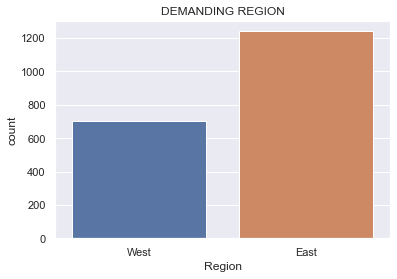

In [40]:
sns.set(style="darkgrid")
REGION=sns.countplot(x="Region",data=all_data).set_title("DEMANDING REGION")


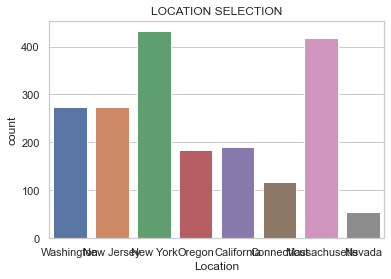

In [41]:
sns.set(style="whitegrid")
REGION=sns.countplot(x="Location",data=all_data).set_title("LOCATION SELECTION")

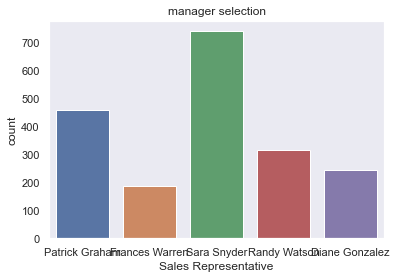

In [44]:
sns.set(style="dark")
REGION=sns.countplot(x="Sales Representative",data=all_data).set_title("manager selection")

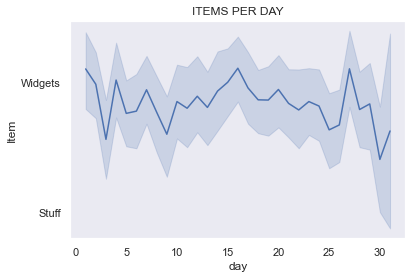

In [45]:
gendercount=sns.lineplot(x="day",y="Item",data=all_data).set_title("ITEMS PER DAY")

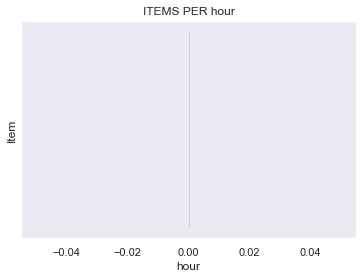

In [46]:
gendercount=sns.lineplot(x="hour",y="Item",data=all_data).set_title("ITEMS PER hour")

Text(0.5, 1.0, 'ITEM DEMAND')

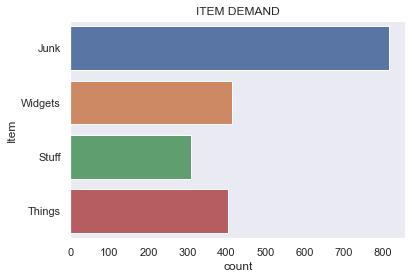

In [47]:
sns.countplot(y="Item",data=all_data).set_title("ITEM DEMAND")

Text(0.5, 1.0, 'ITEM PRICE')

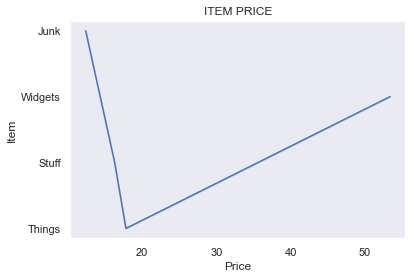

In [51]:
sns.lineplot(y="Item",x="Price",data=all_data).set_title("ITEM PRICE")

<AxesSubplot:xlabel='Customer', ylabel='Total Sale Amount'>

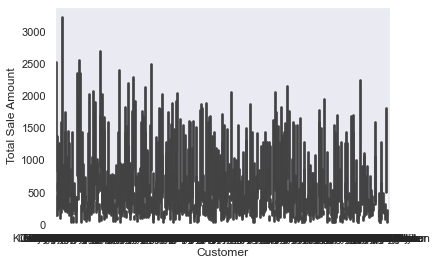

In [55]:
sns.barplot(x="Customer",y="Total Sale Amount",estimator=sum,data=all_data)
